# Now let's imagine that our Slot Machines are non-stationary
Meaning their probabilities of dispensing coins changes over time
First we let our usual Agent play against this kind of slot machine. 
Our usual Agent treats rewards at all rounds equally when updating values associated with each slot machine

In [1]:
import numpy as np
from multi_armed_bandit import NonStationaryBandit,Agent,AlphaAgent

In [2]:
# play the game
from tqdm import tqdm

num_epics = 200
numb_actions = 10
epsilon = 0.1
numb_rounds = 1000


epic_average_rewards=[]

for epic in tqdm(range(num_epics),desc="Epic loop"):
    environment = NonStationaryBandit(numb_actions)
    agent = Agent(numb_actions, epsilon)

    total_reward = 0
    total_rewards = []
    average_rewards = []

    for step in tqdm(range(numb_rounds)):
        chosen_action = agent.choose_action()
        reward = environment.play(chosen_action)
        agent.update_action_value(chosen_action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        average_rewards.append(total_reward/(step+1))
    epic_average_rewards.append(average_rewards)

cros_epic_average_rewards=np.mean(epic_average_rewards,axis=0)

Epic loop: 100%|██████████| 200/200 [00:17<00:00, 11.14it/s]


In [7]:
# play the game
from tqdm import tqdm

num_epics = 200
numb_actions = 10
epsilon = 0.1
numb_rounds = 1000


alpha_epic_average_rewards=[]

for epic in tqdm(range(num_epics),desc="Epic loop"):
    environment = NonStationaryBandit(numb_actions)
    agent = AlphaAgent(numb_actions, epsilon,alpha=0.8)

    total_reward = 0
    total_rewards = []
    average_rewards = []

    for step in tqdm(range(numb_rounds)):
        chosen_action = agent.choose_action()
        reward = environment.play(chosen_action)
        agent.update_action_value(chosen_action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        average_rewards.append(total_reward/(step+1))
    alpha_epic_average_rewards.append(average_rewards)

alpha_cros_epic_average_rewards=np.mean(alpha_epic_average_rewards,axis=0)

Epic loop:   1%|          | 2/200 [00:00<00:15, 12.93it/s]

Epic loop: 100%|██████████| 200/200 [00:20<00:00,  9.91it/s]


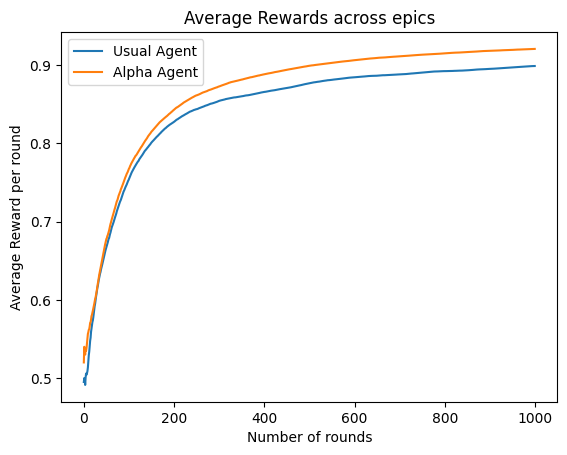

In [8]:
# let's draw average rewards per round across epics
import matplotlib.pyplot as plt

plt.figure()
plt.plot(cros_epic_average_rewards,label="Usual Agent")
plt.plot(alpha_cros_epic_average_rewards,label="Alpha Agent")
plt.legend()
plt.title("Average Rewards across epics")
plt.xlabel("Number of rounds")
plt.ylabel("Average Reward per round")
plt.show()